In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\User\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Loads the Bosten Housing Pricing Dataset

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
california=fetch_california_housing()

In [5]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:
#Check the description of the data
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [7]:
print(california.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [8]:
print(california.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [9]:
print(california.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


# Preparing Dataset

In [10]:
dataset=pd.DataFrame(california.data,columns=california.feature_names)

In [11]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
dataset['Price']=california.target

In [13]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [15]:
#Summerising the data
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [16]:
#check the missing value
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [17]:
###Exploratory Data Analysis
##Correlation
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Text(0, 0.5, 'Price')

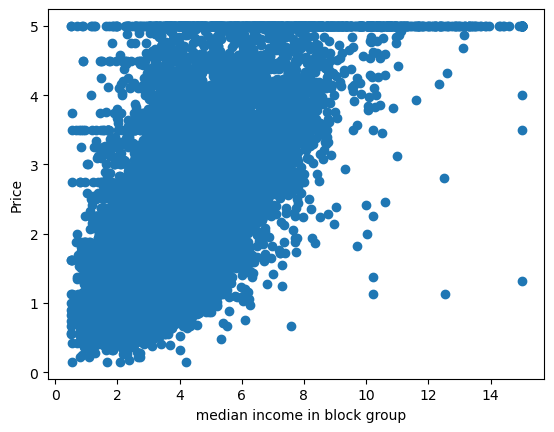

In [18]:
plt.scatter(dataset['MedInc'],dataset['Price'])
plt.xlabel('  median income in block group')
plt.ylabel('Price')

<Axes: xlabel='MedInc', ylabel='Price'>

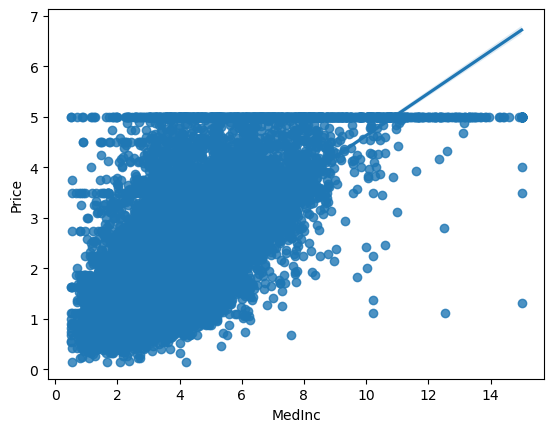

In [19]:
#Cretae reg plot
import seaborn as sns
sns.regplot(x='MedInc',y='Price',data=dataset)

<Axes: xlabel='Population', ylabel='Price'>

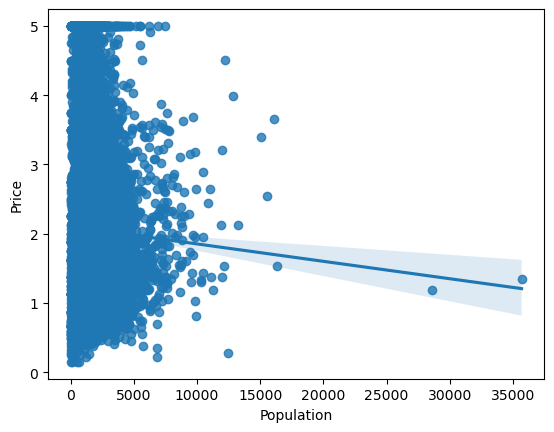

In [20]:
#Cretae reg plot
import seaborn as sns
sns.regplot(x='Population',y='Price',data=dataset)

<Axes: xlabel='AveRooms', ylabel='AveOccup'>

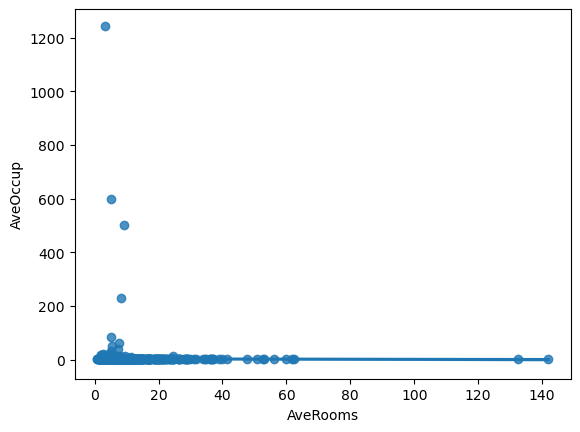

In [21]:
#Cretae reg plot
import seaborn as sns
sns.regplot(x='AveRooms',y='AveOccup',data=dataset)

In [22]:
#independednt and dependent feature
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [23]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [24]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [27]:
x_train.shape

(14448, 8)

In [28]:
x_test.shape

(6192, 8)

In [29]:
y_train.shape

(14448,)

In [30]:
y_test.shape

(6192,)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scale=StandardScaler()

In [33]:
x_train_S=scale.fit_transform(x_train)
x_train_S

array([[-1.00761701, -1.40647927, -0.25527447, ...,  0.0163765 ,
         0.56524911, -0.11042831],
       [-0.17412294,  0.58791589, -0.71299786, ..., -0.12449897,
        -0.87155732,  0.70898786],
       [ 0.82912272, -1.56603088,  0.4310291 , ..., -0.01685782,
        -0.17181393, -0.57010079],
       ...,
       [-0.85413284,  1.54522556, -0.15787995, ...,  0.07441215,
         1.14370364, -1.33955256],
       [-0.61867776, -1.00760024, -0.05088692, ..., -0.06339051,
         0.62589353, -1.1696736 ],
       [ 1.34038453,  0.58791589,  0.52097594, ..., -0.03884091,
         0.81715673, -1.2696024 ]])

In [34]:
x_test_S=scale.transform(x_test)
x_test_S

array([[-0.77881679,  0.02948524, -0.04044502, ...,  0.0640164 ,
        -0.84823254,  0.82890242],
       [ 0.88421013, -0.36939379,  0.52773554, ..., -0.03151157,
        -0.63364457,  0.17436877],
       [ 0.16532743, -0.13006637,  0.58138268, ..., -0.00385945,
        -0.43305146,  0.70399142],
       ...,
       [ 0.19337289,  0.42836427, -0.33121362, ..., -0.00728843,
        -0.84356758,  0.76894514],
       [-0.33626899,  0.18903686, -0.36350279, ...,  0.02360066,
         0.81249177, -1.12970208],
       [ 0.81391163, -0.84804862,  0.46493142, ..., -0.00316125,
        -1.01617095,  0.94881698]])

# Model Training

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
reg=LinearRegression()

In [37]:
reg.fit(x_train_S,y_train)

LinearRegression()

In [38]:
#Print Coefficient and intercept

print(reg.coef_)

[ 0.83071329  0.10576823 -0.27844478  0.3031203  -0.00769734 -0.04524797
 -0.89511116 -0.86652632]


In [39]:
print(reg.intercept_)

2.066207134551496


In [40]:
#on which parameters the model has been trained
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [41]:
#Prediction with test data
reg_pred=reg.predict(x_test)
reg_pred

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([69.73143245, 73.22428514, 57.38727437, ..., 64.07778387,
       58.42499678, 72.80519352])

In [42]:
reg.score(x_train_S,y_train)

0.6025855107340039

# Assumption

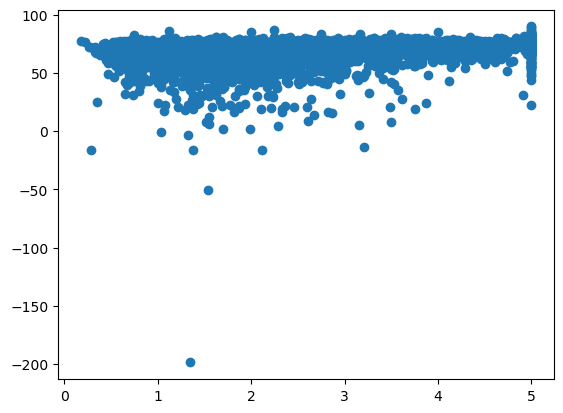

In [43]:
#Scatter plot for prediction
plt.scatter(y_test,reg_pred)

#if the plot is linear prediction is almost good

In [44]:
#Residual or error
residual=y_test-reg_pred
residual.count()

6192

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


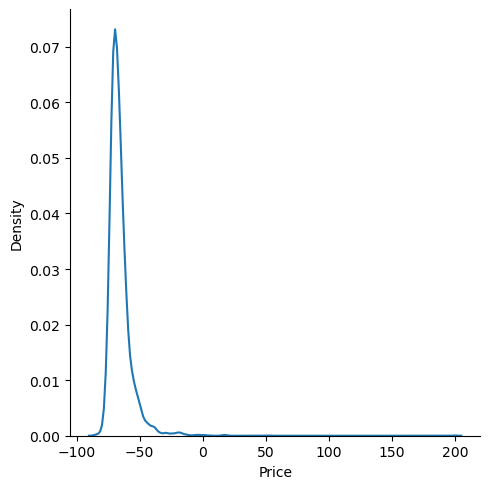

In [45]:
#plot this residual
sns.displot(residual,kind='kde')

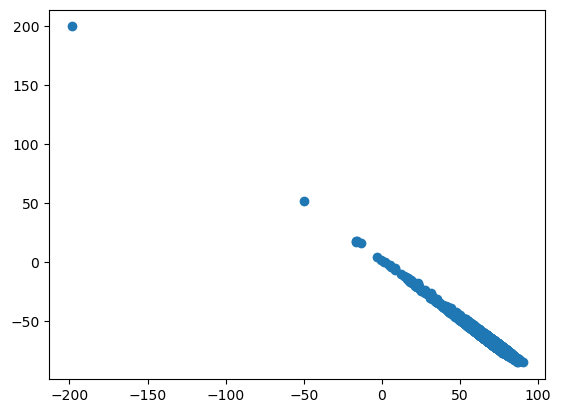

In [46]:
#Scatter plot respect to prediction and residual
#Uniform Matrix
plt.scatter(reg_pred,residual)

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

4396.298721351126
65.71883016256453
66.30459049983739


# R_Squared and Adjusted R_squared

In [53]:
#Adjusted R_squared will be less than R_squared always
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
score

-3251.8478143087395

# New Data Prediction

In [56]:
california.data[0].reshape(1,-1).shape

(1, 8)

In [59]:
scale.transform(california.data[0].reshape(1,-1))

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.35894692,  0.98679492,  0.65415615, -0.15470052, -0.98806437,
        -0.04526803,  1.04573957, -1.32955968]])

In [60]:
reg.predict(scale.transform(california.data[0].reshape(1,-1)))

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.12684707])

# Pickling the model file for deployment

In [62]:
import pickle

In [63]:
pickle.dump(reg,open('regmodel.pkl','wb'))

In [64]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [65]:
pickled_model.predict(scale.transform(california.data[0].reshape(1,-1)))

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.12684707])